In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
# General imports
import os
from pathlib import Path 
import numpy as np
from matplotlib import pyplot as plt
from hyperbolicTSNE.quality_evaluation_ import hyperbolic_nearest_neighbor_preservation

## QR question

### How to interpret the Precision-Recall metric?
- Is our goal to show that the Gaussian results in "better" PR curves than t-distrib. results?
- Ideally Precision ~ 1 and Recall grows with k/kmax (if plotted against k)
- However, in a P-R curve, ideally we want:

### P-R Curves notes:
- PR metric does not give a definitive objective statement about the superiority of a method
- Correct t-sne gradient has "better" PR than incorrect t-sne gradient
- Correct gaussian gradient has worse PR than both t-sne gradients
- What statement/conclusions can be drawn from this?
- Add PR curves for all 3 versions of the gradient. Wrong, no metric; Wrong, metric; Correct, metric; 

# Quality retention experiments

**Experiments from 137 onwards contain all necessary data for QR experiments**

For several datasets (MINIST, C_ELEGANS, PLANARIA, Tree-Data, ...) we compare the following kinds of embeddings:
1. HyperbolicKL, Wrong grad, No scale_fix
2. HyperbolicKL, Correct grad, Yes scale_fix
3. GaussianKL, Correct Grad, Yes scale_fix

### Relevant Experiments

1. C_ELEGANS
    - 137: HyperbolicKL, wrong grad, no scale_fix, 0.416 lr.
    - 138: HyperbolicKL, correct grad, scale_fix, 0.416 lr.
    - 139: GaussianKL, correct grad, scale_fix, 8.3 lr.
    - 140: HyperbolicKL, correct grad, scale_fix, 41.6 lr.
    - 141: GaussianKL, correct grad, scale_fix, 0.833 lr.

In [28]:
def plot_PR(thresholds, precisions, recalls, true_pos):
    fig, ax = plt.subplots()
    ax.scatter(precisions, recalls)

    return fig


def plot_PR_3(w_prec, w_rec, c_prec, c_rec, g_prec, g_rec):
    fig, ax = plt.subplots()

    ax.plot(w_prec, w_rec, label="Wrong t-sne", color="red")
    ax.plot(c_prec, c_rec, label="Correct t-sne ", color="green")
    ax.plot(g_prec, g_rec, label="Correct Gaussian", color="orange")

    ax.set_xlabel("Precision")
    ax.set_ylabel("Recall")

    ax.legend()
    
    return fig

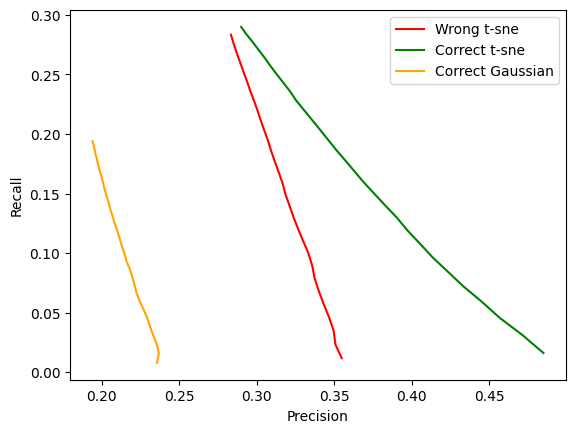

In [29]:
# Dataset
dataset = "MNIST" 
strict = False

######################
# (1) Wrong t-sne path
wrong_grad_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_1"
wrong_hd_emb = np.loadtxt(wrong_grad_path + "/high_dim_emb.csv", delimiter=',')
wrong_ld_emb = np.loadtxt(wrong_grad_path + "/emb.csv", delimiter=",")

# Compute PR metrics
wr_thresholds, wr_precisions, wr_recalls, wr_nums_true_positives = hyperbolic_nearest_neighbor_preservation(X=wrong_hd_emb, 
                                                                                                Y=wrong_ld_emb,
                                                                                                k_max=30,
                                                                                                to_return="full",
                                                                                                strict=strict)

# Plot PR
# fig_1 = plot_PR(wr_thresholds, wr_precisions, wr_recalls, wr_nums_true_positives)




########################
# (2) Correct t-sne path
corr_grad_path = f"experiments_thesis/HyperbolicKL/{dataset}/experiment_3"
corr_hd_emb = np.loadtxt(corr_grad_path + "/high_dim_emb.csv", delimiter=',')
corr_ld_emb = np.loadtxt(corr_grad_path + "/emb.csv", delimiter=",")

# Compute PR metrics
corr_thresholds, corr_precisions, corr_recalls, corr_nums_true_positives = hyperbolic_nearest_neighbor_preservation(X=corr_hd_emb, 
                                                                                                Y=corr_ld_emb,
                                                                                                k_max=30,
                                                                                                to_return="full",
                                                                                                strict=strict)

# Plot PR
# fig_2 = plot_PR(corr_thresholds, corr_precisions, corr_recalls, corr_nums_true_positives)





###################
# (3) Gaussian path
gauss_grad_path = f"experiments_thesis/GaussianKL/{dataset}/experiment_1"
gauss_hd_emb = np.loadtxt(gauss_grad_path + "/high_dim_emb.csv", delimiter=',')
gauss_ld_emb = np.loadtxt(gauss_grad_path + "/emb.csv", delimiter=",")

# Compute PR metrics
gauss_thresholds, gauss_precisions, gauss_recalls, gauss_nums_true_positives = hyperbolic_nearest_neighbor_preservation(X=gauss_hd_emb, 
                                                                                                Y=gauss_ld_emb,
                                                                                                k_max=30,
                                                                                                to_return="full",
                                                                                                strict=strict)


# Plot PR
# fig_3 = plot_PR(gauss_thresholds, gauss_precisions, gauss_recalls, gauss_nums_true_positives)
fig = plot_PR_3(wr_precisions, wr_recalls, corr_precisions, corr_recalls, gauss_precisions, gauss_recalls)

plt.show()

In [30]:
print(corr_recalls)
print(gauss_recalls)

print(len(gauss_recalls))

[0.016166666666666663, 0.03141666666666666, 0.04567333333333333, 0.05934, 0.07220333333333333, 0.08462, 0.09646000000000002, 0.10804666666666667, 0.11914333333333334, 0.13005666666666665, 0.1403, 0.1502166666666667, 0.15979000000000002, 0.1692266666666667, 0.17834666666666668, 0.18713333333333335, 0.19580666666666668, 0.20421333333333336, 0.21234666666666668, 0.22022666666666668, 0.22785, 0.23572666666666664, 0.24307333333333336, 0.25021333333333334, 0.2572233333333333, 0.26423, 0.27086333333333334, 0.2773799999999999, 0.28353666666666666, 0.2898299999999999]
[0.00785, 0.015783333333333333, 0.023543333333333333, 0.031079999999999997, 0.03849999999999999, 0.04583, 0.052926666666666664, 0.059820000000000005, 0.06669666666666665, 0.07366000000000002, 0.08047333333333334, 0.08713333333333335, 0.0935, 0.10006666666666668, 0.10638666666666668, 0.11271666666666667, 0.11893333333333335, 0.12495333333333333, 0.13101000000000002, 0.13693333333333335, 0.14293666666666668, 0.14874, 0.1544966666666

In [31]:
i = 100000000
x = 0
for i in range(i):
    x += 1

print(x)

100000000
